<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Actividad 7</h2></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Javier González</h3></center>
<center><h3>https://github.com/JavierGonzalezP/EIE_401_MULTIMEDIA</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


## 1. Operaciones usando Pytorch y OpenCV

1.   Elemento de la lista
2.   Elemento de la lista



### 1.1 Instala Numpy, Pytorch y OpenCV:
- Carga una imagen desde un archivo con extensión JPG, usando numpy, pytorch y opencv.
- Presenta la imagen
- Transforma la imagen de color a escala de grises usando cada uno de los paquetes
- Guarda la imagen nueva.
- Presenta la imagen transformada en el notebook.

<p align="justify">
Asegurate de presentar adecuandamente la imagen, usando Matplotlib u otro medio de ploteo.

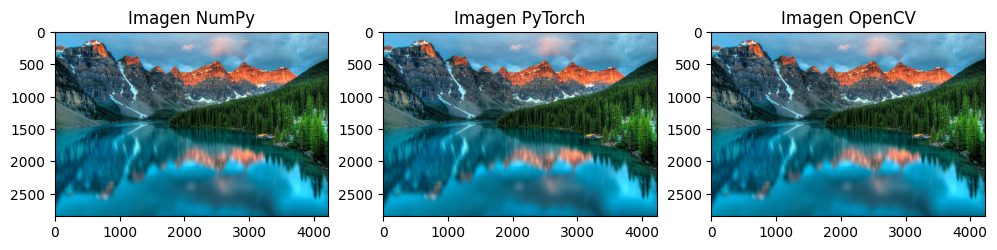

In [95]:
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as T
from torchvision import io
from torchvision import transforms

# Carga con Numpy
imagen_numpy = np.array(Image.open('paisaje.jpg'))

# Carga con PyTorch
imagen_pytorch = io.read_image('paisaje.jpg')
imagen_pytorch = T.ToPILImage()(imagen_pytorch)

# Carga con OpenCV
imagen_opencv = cv2.imread('paisaje.jpg')
imagen_opencv_rgb = cv2.cvtColor(imagen_opencv, cv2.COLOR_BGR2RGB)


# Se muestran las 3 imagenes
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(imagen_numpy)
plt.title('Imagen NumPy')

plt.subplot(1, 3, 2)
plt.imshow(imagen_pytorch)
plt.title('Imagen PyTorch')

plt.subplot(1, 3, 3)
plt.imshow(imagen_opencv_rgb)
plt.title('Imagen OpenCV')

plt.show()


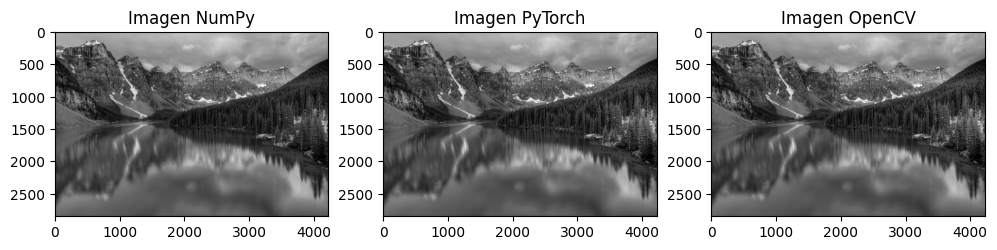

In [96]:
# Escala de grises Numpy
imagen_gray_np = np.mean(imagen_numpy, axis=2)
Image.fromarray(imagen_gray_np.astype(np.uint8)).save('imagen_gray_np.png')

# Escala de grises PyTorch
transform = T.Compose([
    T.Grayscale(),
    T.ToTensor(),
])
img_gray_torch = transform(imagen_pytorch)
img_gray_torch_pil = T.ToPILImage()(img_gray_torch)
img_gray_torch_pil.save('imagen_gray_torch.png')

# Escala de grises OpenCV
img_gray_cv2 = cv2.cvtColor(imagen_opencv_rgb, cv2.COLOR_RGB2GRAY)
cv2.imwrite('imagen_gray_cv2.png', img_gray_cv2)

# Se muestran las imagenes
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(imagen_gray_np, cmap='gray')
plt.title('Imagen NumPy')

plt.subplot(1, 3, 2)
plt.imshow(img_gray_torch_pil, cmap='gray')
plt.title('Imagen PyTorch')

plt.subplot(1, 3, 3)
plt.imshow(img_gray_cv2, cmap='gray')
plt.title('Imagen OpenCV')

plt.show()

## 2. Multiples operaciones con tensores
### ¡USA LA IMAGEN ADJUNTA image.png!

#### 2.1 Aplica una transformación puntual. Modifica el valor de los pixeles considerando un valor de umbral (threshold). la función de treshold debe ser una rampa con una pendiente dada (tu defines el valor de la pendiente) y cuyo valor mínimo será 0 y el máximo será 255 (valores típicos de los pixeles).

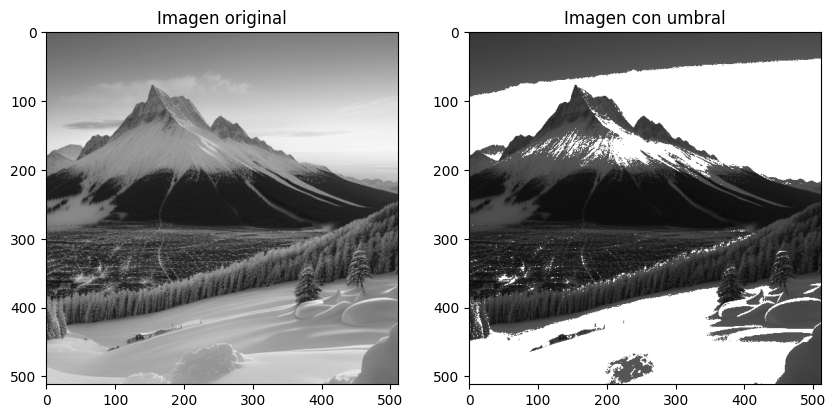

In [97]:
# Carga de la imagen
image = cv2.imread('image.png')

# Convertir la imagen a escala de grises
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

slope = 0.7 # Pendiente de la rampa

# Función de umbral
def threshold_function(x):
  if x < 128:
    return x * slope
  else:
    return 255

# Se aplica la función de umbral a la imagen
thresholded_image = np.zeros_like(gray_image)
for i in range(gray_image.shape[0]):
  for j in range(gray_image.shape[1]):
    thresholded_image[i, j] = threshold_function(gray_image[i, j])

# Se muestra la imagen original y la imagen con umbral
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Imagen original')

plt.subplot(1, 2, 2)
plt.imshow(thresholded_image, cmap='gray')
plt.title('Imagen con umbral')

plt.show()


#### 2.2 Aplica una transformación en la vecindad.
- Debes hacer una vecindad con dimensiones de 5x5 pixeles.
- Aplica la transformación de tal forma que los pixeles cambien para tener el valor correspondiente al máximo de todos los vecinos.
- Debes hacer la misma operación a lo largo y ancho de toda la imagen. Esto implica, de forma iterativa, recorrer la imagen.



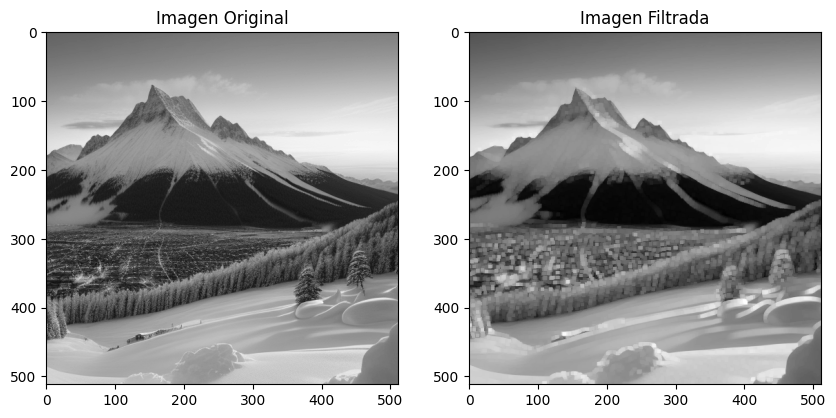

In [98]:
def apply_max_filter(image, neighborhood_size):
  # Se calcula el tamaño del relleno
  tamaño_relleno = (neighborhood_size - 1) // 2
  # Se rellena la imagen
  imagen_rellena = np.pad(image, tamaño_relleno, mode='edge')
  # Nueva imagen para almacenar el resultado filtrado
  imagen_filtrada = np.zeros_like(image)

  # Iterar sobre la imagen
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      # Extraer el vecindario
      vecindario = imagen_rellena[i:i + neighborhood_size, j:j + neighborhood_size]
      # Se calcula el valor máximo en el vecindario
      valor_maximo = np.max(vecindario)
      # Se asigna el valor máximo al píxel correspondiente en la imagen filtrada
      imagen_filtrada[i, j] = valor_maximo
  return imagen_filtrada

# Se filtra la imagen
imagen_filtrada = apply_max_filter(gray_image, neighborhood_size=5)

# Mostrar las imágenes original y filtrada
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Imagen Original')
plt.subplot(1, 2, 2)
plt.imshow(imagen_filtrada, cmap='gray')
plt.title('Imagen Filtrada')
plt.show()


#### 2.3 Aplica transformación de intensidad
![image.png](attachment:image.png)
- Debes hacer una vecindad con dimensiones de 10x10 pixeles.
- Aplica la transformación que aparece en la ecuación de tal forma que los pixeles cambien dependiendo de la posición (r) y el coeficiente c (de tu elección).
- Debes hacer la misma operación a lo largo y ancho de toda la imagen. ESto implica, de forma iterativa, recorrer la imagen.

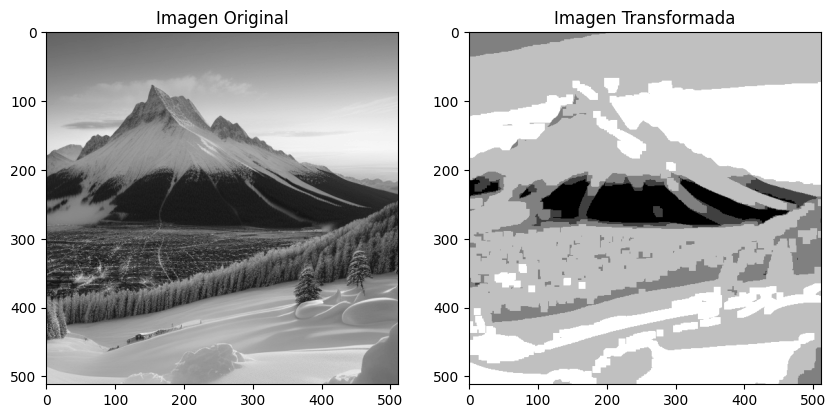

In [99]:
def apply_log_transform(image, neighborhood_size, c):
  # Se calcula el tamaño del relleno
  tamaño_relleno = (neighborhood_size - 1) // 2
  # Se rellena la imagen
  imagen_rellena = np.pad(image, tamaño_relleno, mode='edge')
  # Nueva imagen para almacenar el resultado filtrado
  imagen_transformada = np.zeros_like(image)

  # Iterar sobre la imagen
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      # Extraer el vecindario
      vecindario = imagen_rellena[i:i + neighborhood_size, j:j + neighborhood_size]
      # Calcular el valor máximo en el vecindario
      r = np.max(vecindario)
      # Transformación logarítmica
      s = c * np.log10(1 + r)
      # Se asigna el valor transformado al píxel correspondiente en la imagen filtrada
      imagen_transformada[i, j] = s
  return imagen_transformada

# Se transforma la imagen
c = 5
imagen_transformada = apply_log_transform(gray_image, neighborhood_size=10, c=c)

# Mostrar las imágenes original y transformada
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Imagen Original')
plt.subplot(1, 2, 2)
plt.imshow(imagen_transformada, cmap='gray')
plt.title('Imagen Transformada')
plt.show()


#### 2.4 Operación con Kernel
- Realiza tres operaciones de convolución en cascada.
- Utiliza torch nn.Conv2d
- Debes calcular el stride, padding y demás parámetros para que obtengas 16 canales de salida.
- Muestra una imagen de cada canal resultante de la convolución.

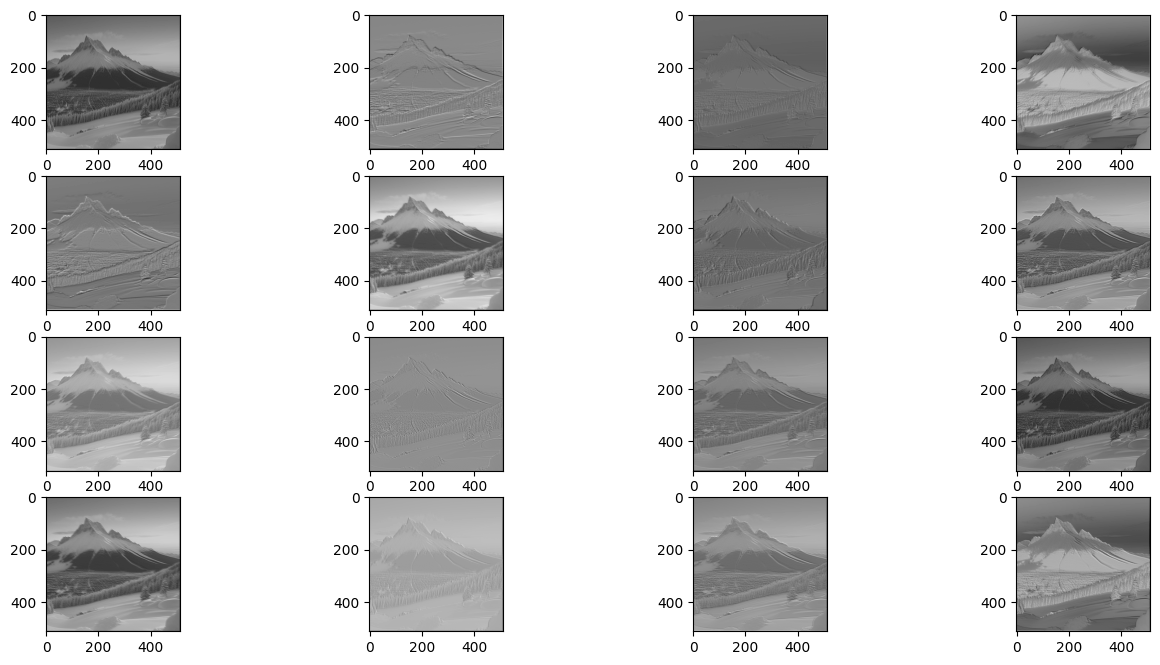

In [100]:
import torch.nn as nn

# Carga de la imagen
image = cv2.imread('image.png')

# Se convierte la imagen a escala de grises
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Se convierte la imagen a un tensor de PyTorch
tensor_image = torch.from_numpy(gray_image).unsqueeze(0).unsqueeze(0)

# Se definen las tres capas de convolución
conv1 = nn.Conv2d(1, 4, kernel_size=3, stride=1, padding=1)
conv2 = nn.Conv2d(4, 8, kernel_size=3, stride=1, padding=1)
conv3 = nn.Conv2d(8, 16, kernel_size=3, stride=1, padding=1)

# Se convierten el tipo de datos de entrada a float
tensor_image = tensor_image.float()

# Aplicar las tres capas de convolución
conv1_output = conv1(tensor_image)
conv2_output = conv2(conv1_output)
conv3_output = conv3(conv2_output)

# Obtener los 16 canales de salida
channels = conv3_output.squeeze(0).split(1, dim=0)
channels = list(conv3_output.squeeze(0).split(1, dim=0))
for i in range(16):
  channels[i] = channels[i].reshape(512, 512)

# Se muestra una imagen de cada canal resultante de la convolución
plt.figure(figsize=(16, 8))
for i in range(16):
  plt.subplot(4, 4, i+1)
  plt.imshow(channels[i].detach().numpy(), cmap='gray')
plt.show()


## 3. Realiza la inversión de imagen

### 3.1 Utilizando estrictamente numpy, busca y usa una imagen binaria y realizar la inversión de dicha imagen.
### Recuerda adjuntar la imagen a la entrega de tu trabajo.


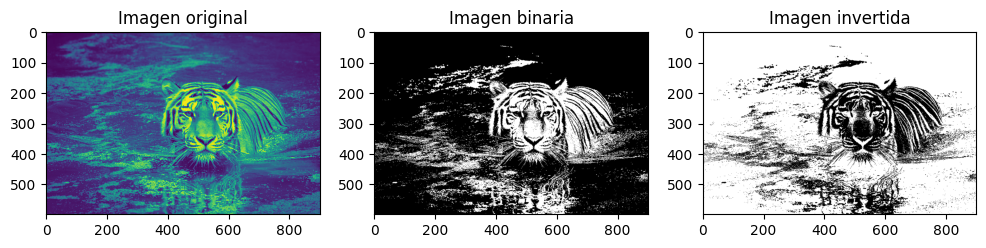

In [102]:
# Carga de la imagen
image = Image.open('tiger.jpg').convert('L')
image_array = np.array(image)

# Se binariza la imagen
threshold = 128
image_binary = np.where(image_array > threshold, 255, 0)

# Se invierte la imagen
image_inverted = np.invert(image_binary)

# Mostrar las imágenes
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(image_array)
plt.title('Imagen original')
plt.subplot(1, 3, 2)
plt.imshow(image_binary, cmap='gray')
plt.title('Imagen binaria')
plt.subplot(1, 3, 3)
plt.imshow(image_inverted, cmap='gray')
plt.title('Imagen invertida')
plt.show()


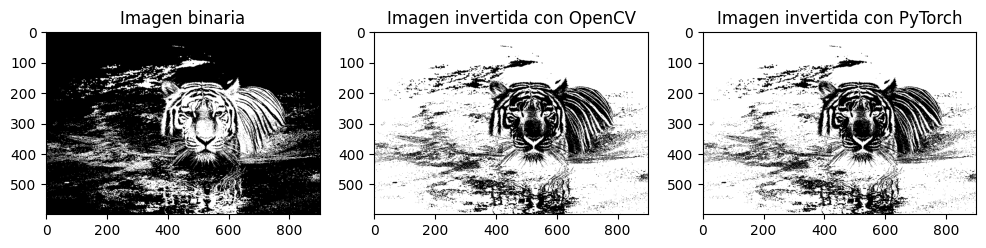

In [103]:
# Invertir la imagen con OpenCV
image_inverted_cv2 = cv2.bitwise_not(image_binary)

# Invertir la imagen con PyTorch
tensor_image = torch.from_numpy(image_binary).unsqueeze(0).unsqueeze(0)
image_inverted_torch = 255 - tensor_image.squeeze(0).squeeze(0).numpy()

# Mostrar las imágenes
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(image_binary, cmap='gray')
plt.title('Imagen binaria')
plt.subplot(1, 3, 2)
plt.imshow(image_inverted_cv2, cmap='gray')
plt.title('Imagen invertida con OpenCV')
plt.subplot(1, 3, 3)
plt.imshow(image_inverted_torch, cmap='gray')
plt.title('Imagen invertida con PyTorch')
plt.show()

## 4. Segmentación de imagen
#### 4.1 Realiza un algoritmo para dividir una imagen con 3 canales RGB de 512x512, en parches (secciones) de 16x16. Presenta cada parche generado de la imagen.
El algoritmo debe tolerar el cambio de imagen por una de menor tamano (128, 64). Claramente, en cada caso el número de parches será menor.
    

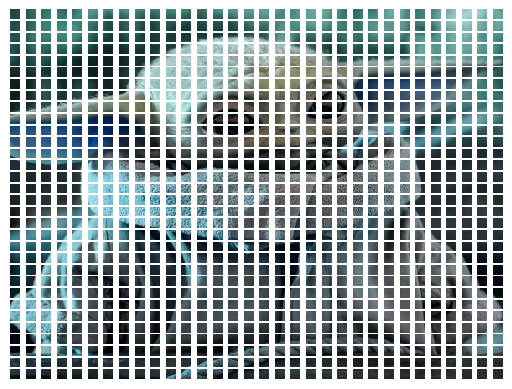

In [107]:
# Se carga la imagen
image = cv2.imread("baby_yoda.png")      # Imagen de 512x512
#image = cv2.imread("baby_yoda_128.png") # Imagen de 128x128
#image = cv2.imread("baby_yoda_64.png")  # Imagen de 64x64

# Se obtiene el tamaño de la imagen
height, width = image.shape[:2]

# Tamaño del parche
square_size = 16

# Se calcula el número de parches en cada dimensión
num_squares_x = width // square_size
num_squares_y = height // square_size

# Figura para mostrar los parches
fig, axes = plt.subplots(num_squares_y, num_squares_x)

# Iterar sobre los cuadrados
for i in range(num_squares_y):
    for j in range(num_squares_x):
        # Extraer el cuadrado de la imagen
        square = image[i * square_size:(i + 1) * square_size, j * square_size:(j + 1) * square_size]

        # Mostrar el cuadrado en la figura
        axes[i, j].imshow(square)
        axes[i, j].axis('off')

plt.show()

## 5. Referencias
<p align="justify">
    
[OpenCV] https://docs.opencv.org/4.x/d7/da8/tutorial_table_of_content_imgproc.html

[inversion] https://medium.com/analytics-vidhya/inverting-an-image-using-numpys-broadcasting-method-1f5beb7f9fa5#:~:text=In%20order%20to%20invert%20the,negation)%20operation%20to%20the%20image.
